### Importing Modules and Loading Dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #plotting
import seaborn as sns
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

df = pd.read_csv('titles.csv')
df.head(3)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300


### Information About Dataset

In [3]:
# Row and Column Counts

shape = pd.DataFrame({"Total Rows": [df.shape[0]],
                      "Total Columns": [df.shape[1]]
                     },index=[""]
                    )
shape

,Total Rows,Total Columns
,5850,15


In [4]:
# Data types

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [5]:
# Counts of Null Values

df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

### Cleaning Data

In [6]:
# Let's drop useless columns
df = df.drop(['id', 'description', 'imdb_id', 'tmdb_score'], axis=1)
df.head(3)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,0.600
1,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",['US'],NaN,8.2,808582.0,40.965
2,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,7.7,107673.0,10.010


In [7]:
# Remove Null Values, Type Conversions and number's format changes
df['seasons'] = df['seasons'].fillna(0)
df['seasons'] = df['seasons'].astype(int)

df['imdb_votes'].fillna(0, inplace=True)
df['imdb_votes'].replace([np.inf, -np.inf], 0, inplace=True)
df['imdb_votes'] = df['imdb_votes'].astype(int)
df['imdb_votes'] = df['imdb_votes'].apply(lambda x: format(x, ','))

df = df[df['imdb_score'].notna()]

In [8]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity
1,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",['US'],0,8.2,"808,582",40.965
2,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0,7.7,"107,673",10.010
3,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0,8.2,"534,486",15.461
4,The Dirty Dozen,MOVIE,1967,NaN,150,"['war', 'action']","['GB', 'US']",0,7.7,"72,662",20.398
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4,8.8,"73,424",17.617


In [9]:
# Number of Unique Values of Each Column

df.nunique()

title                   5324
type                       2
release_year              62
age_certification         11
runtime                  198
genres                  1695
production_countries     427
seasons                   27
imdb_score                80
imdb_votes              3881
tmdb_popularity         4587
dtype: int64

In [10]:
# Categorization of Categorical and Numerical columns

def col_summary(df):
    categorical_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
    numerical_but_categorical = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]]
    categorical_but_cardinal = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category","object"]]
    categorical_cols = [col for col in df.columns if col not in categorical_but_cardinal]
    numerical_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    numerical_cols = [col for col in df.columns if col not in categorical_cols]
    print(f"Categorical Variables: {categorical_cols}\n\nNumerical But Categorical Variables: {numerical_but_categorical}\n\nCategorical But Numerical Variables: {categorical_but_cardinal}\n\nNumerical Variables: {numerical_cols}")

col_summary(df)

Categorical Variables: ['type', 'release_year', 'age_certification', 'runtime', 'seasons', 'imdb_score', 'tmdb_popularity']

Numerical But Categorical Variables: []

Categorical But Numerical Variables: ['title', 'genres', 'production_countries', 'imdb_votes']

Numerical Variables: ['title', 'genres', 'production_countries', 'imdb_votes']


In [11]:
# Min Max of Dataset

df.describe().loc[['min', 'max']].T.astype(int).style.set_properties(**{"background-color": "#434242", "font-size" : "15px",
                                        "color": "#ffffff"})


,min,max
release_year,1954,2022
runtime,0,225
seasons,0,42
imdb_score,1,9
tmdb_popularity,0,2274


In [12]:
# Value Counts of Tv Shows and Movies

Tv_shows = df[df['type'] == 'SHOW']
Movies = df[df['type'] == 'MOVIE']
Total = df['title'].count()

print(f"Total Tv Show Count: {Tv_shows.title.count()}\nTotal Movie Count: {Movies.title.count()}\nTotal Content: {Total}")

Total Tv Show Count: 1939
Total Movie Count: 3429
Total Content: 5368


#### Visualization of Movies and Tv Shows Count

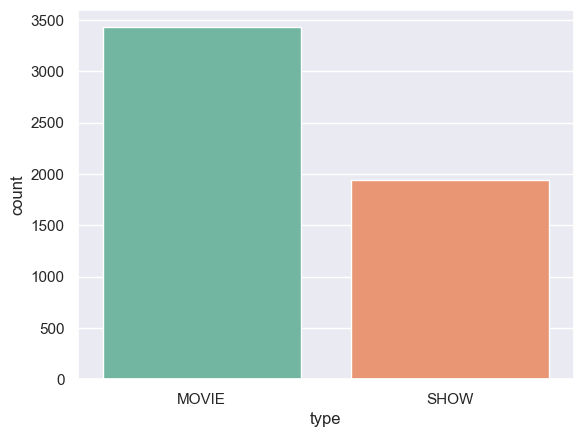

In [13]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

#### Rename Countries

In [14]:
df['production_countries'] = df['production_countries'].apply(lambda x: 'United States' if 'US' in x else x)
df['production_countries'] = df['production_countries'].apply(lambda x: 'India' if 'IN' in x else x)
df['production_countries'] = df['production_countries'].apply(lambda x: 'Japan' if 'JP' in x else x)
df['production_countries'] = df['production_countries'].apply(lambda x: 'Korea' if 'KR' in x else x)
df['production_countries'] = df['production_countries'].apply(lambda x: 'United Kingdom' if 'GB' in x else x)
df['production_countries'] = df['production_countries'].apply(lambda x: 'Spain' if 'ES' in x else x)
df['production_countries'] = df['production_countries'].apply(lambda x: 'France' if 'FR' in x else x)
df['production_countries'] = df['production_countries'].apply(lambda x: 'Canada' if 'CA' in x else x)
df['production_countries'] = df['production_countries'].apply(lambda x: 'Mexico' if 'MX' in x else x)
df['production_countries'] = df['production_countries'].apply(lambda x: 'Brazil' if 'BR' in x else x)

#### Top 10 countries with the most content

In [15]:
countries = df['production_countries'].value_counts().sort_values(ascending=False).head(10)
countries = pd.DataFrame(countries)
countries.iloc[0:10]

,production_countries
United States,2163
India,582
United Kingdom,251
Japan,247
Korea,193
Spain,188
France,182
[],174
Canada,105
Mexico,96


In [16]:
# Remove [] 
df = df[~df["production_countries"].isin(["[]"])]

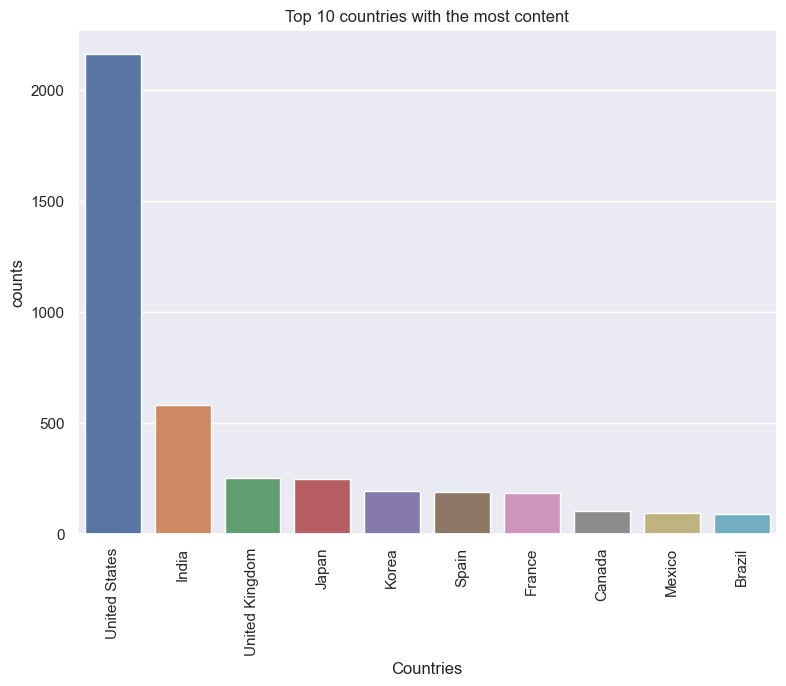

In [17]:
plt.figure(figsize=(8, 7))
sns.countplot(data=df, x ='production_countries', order=df.production_countries.value_counts().iloc[:10].index)
plt.title("Top 10 countries with the most content")
plt.ylabel('counts')
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.tight_layout(pad=1.0, w_pad=10.0, h_pad=10.0)
plt.show(block=True)

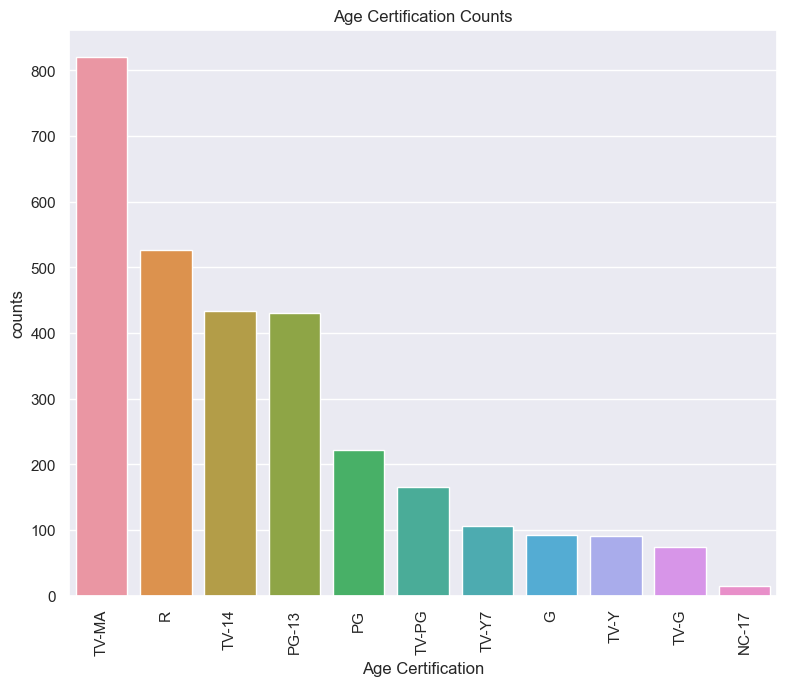

In [18]:
plt.figure(figsize=(8, 7))
sns.countplot(data=df, x ='age_certification', order=df.age_certification.value_counts().sort_values(ascending=False).index)
plt.title("Age Certification Counts")
plt.ylabel('counts')
plt.xlabel('Age Certification')
plt.xticks(rotation=90)
plt.tight_layout(pad=1.0, w_pad=10.0, h_pad=10.0)
plt.show(block=True)

In [19]:
# Movie and Tv Show stats from top 10 Countries
import math
country_stats = df.groupby(['production_countries', 'type']).agg(Score_mean=('imdb_score', 'mean'),
                                                                 Score_min=('imdb_score', 'min'),
                                                                 Score_max=('imdb_score', 'max'),
                                                                 Content_count=('title', 'count'),
                                                                 Year_with_the_most_content=('release_year', 'mean'))

#country_stats = asd.sort_values(by='content_count', ascending=False).iloc[0:20]

country_stats['Year_with_the_most_content'] = country_stats['Year_with_the_most_content'].astype(int)
country_stats['Score_mean'] = country_stats['Score_mean'].apply(lambda x: int(x * 10) / 10)
country_stats['Score_min'] = country_stats['Score_min'].apply(lambda x: '%.1f' % x)
country_stats['Score_max'] = country_stats['Score_max'].apply(lambda x: '%.1f' % x)
country_stats['Score_mean'] = country_stats['Score_mean'].apply(lambda x: '%.1f' % x)

country_stats.iloc[0:20].sort_values(by='production_countries', ascending=False).style.set_properties(**{"font-size" : "15px",
                                        "color": "#000", "border": "1px solid black"})

#### Number of Tv Shows and Movies Releases by Year

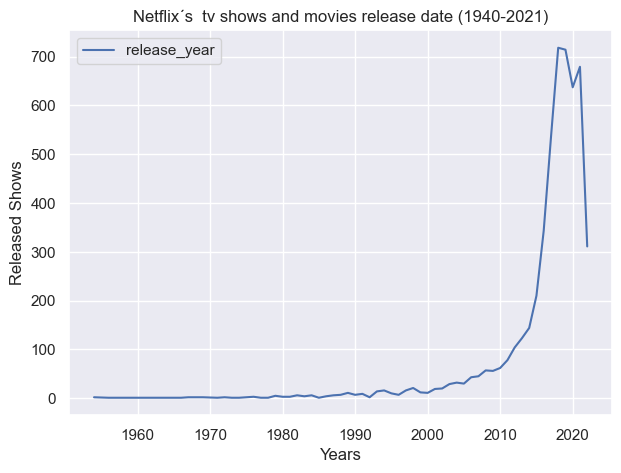

In [20]:
release_year_count = df['release_year'].value_counts()
release_year_count = pd.DataFrame(release_year_count)

plt.figure(figsize=(7,5))
sns.lineplot(data=release_year_count)
plt.title('Netflix´s  tv shows and movies release date (1940-2021)')
plt.xlabel('Years')
plt.ylabel('Released Shows')
plt.show(block=True)



#### Top Rated Movies by Each Year

In [21]:
df_movies_score = df.loc[df['type'] == 'MOVIE', ['release_year', 'title', 'imdb_score']]
df_show_score = df.loc[df['type'] == 'SHOW', ['release_year', 'title', 'imdb_score']]

df_sorted_m = df_movies_score.sort_values(by='imdb_score', ascending=False)
df_grouped_m = df_sorted_m.groupby('release_year').first().reset_index()
df_grouped_m = df_grouped_m[['release_year', 'title', 'imdb_score']]
df_grouped_m = df_grouped_m.sort_values(by='release_year', ascending=False)
df_grouped_m['imdb_score'] = df_grouped_m['imdb_score'].apply(lambda x: round(x, 1))
df_grouped_m.index = np.arange(1, len(df_grouped_m) + 1)
#df_grouped_m = df_grouped_m.head(10).style.set_caption("TOP RATED MOVIES OF LAST 10 YEARS").set_properties(**{"font-size" : "14px", "color": "#000", "border": "1px solid black"})
df_grouped_m.head(10)


,release_year,title,imdb_score
1,2022,Major,9.1
2,2021,Bo Burnham: Inside,8.7
3,2020,David Attenborough: A Life on Our Planet,8.9
4,2019,Rubaru Roshni,8.6
5,2018,C/o Kancharapalem,8.9
6,2017,Bāhubali 2: The Conclusion,8.2
7,2016,Visaranai,8.5
8,2015,A Second Chance,8.6
9,2014,Starting Over Again,8.3
10,2013,Chhota Bheem and the ShiNobi Secret,8.6


#### Top Rated Tv Shows by Each Year

In [22]:
df_sorted_s = df_show_score.sort_values(by='imdb_score', ascending=False)
df_grouped_s = df_sorted_s.groupby('release_year').first().reset_index()
df_grouped_s = df_grouped_s[['release_year', 'title', 'imdb_score']]
df_grouped_s = df_grouped_s.sort_values(by='release_year', ascending=False)
df_grouped_s['imdb_score'] = df_grouped_m['imdb_score'].apply(lambda x: round(x, 1))
df_grouped_s.index = np.arange(1, len(df_grouped_s) + 1)
#df_grouped_m = df_grouped_m.head(10).style.set_caption("TOP RATED MOVIES OF LAST 10 YEARS").set_properties(**{"font-size" : "14px", "color": "#000", "border": "1px solid black"})
df_grouped_s.head(10)

,release_year,title,imdb_score
1,2022,Heartstopper,8.0
2,2021,Arcane,7.0
3,2020,The Last Dance,8.3
4,2019,Our Planet,7.3
5,2018,My Mister,8.1
6,2017,Crazy Delicious,8.7
7,2016,Leah Remini: Scientology and the Aftermath,7.2
8,2015,Reply 1988,7.2
9,2014,"Raja, Rasoi Aur Anya Kahaniyaan",8.5
10,2013,Attack on Titan,8.8


#### Top Rated Movie and Tv Show of all times

In [23]:
# Top Rated Movie and Tv Show on Netflix According to IMDB ()
df.loc[df.groupby(['type'])['imdb_score'].idxmax()][['type', 'production_countries', 'title', 'imdb_score', 'imdb_votes', 'release_year', 'seasons']].reset_index(drop=True)


,type,production_countries,title,imdb_score,imdb_votes,release_year,seasons
0,MOVIE,India,Major,9.1,"7,576",2022,0
1,SHOW,United States,Breaking Bad,9.5,"1,775,990",2008,5


#### Most Popular Movies and Tv Shows by Each Year

In [24]:
df_movies_popularity = df.loc[df['type'] == 'MOVIE', ['release_year', 'title', 'tmdb_popularity']]
df_show_popularity = df.loc[df['type'] == 'SHOW', ['release_year', 'title', 'tmdb_popularity']]

In [25]:
df_sorted_m = df_movies_popularity.sort_values(by='tmdb_popularity', ascending=False)
df_grouped_m = df_sorted_m.groupby('release_year').first().reset_index()
df_grouped_m = df_grouped_m[['release_year', 'title']]
df_grouped_m = df_grouped_m.sort_values(by='release_year', ascending=False)
df_grouped_m.index = np.arange(1, len(df_grouped_m) + 1)
df_grouped_m = df_grouped_m.head(10).style.set_caption("MOST POPULAR MOVIES OF LAST 10 YEARS").set_properties(**{"font-size" : "14px", "color": "#000", "border": "1px solid black"})
df_grouped_m

,release_year,title
1,2022,Incantation
2,2021,Sing 2
3,2020,After We Collided
4,2019,After
5,2018,To All the Boys I've Loved Before
6,2017,The Shack
7,2016,The Conjuring 2
8,2015,Legend
9,2014,How to Train Your Dragon 2
10,2013,The Conjuring


In [26]:
df_sorted_s = df_show_popularity.sort_values(by='tmdb_popularity', ascending=False)
df_grouped_s = df_sorted_s.groupby('release_year').first().reset_index()
df_grouped_s = df_grouped_s[['release_year', 'title']]
df_grouped_s = df_grouped_s.sort_values(by='release_year', ascending=False)
df_grouped_s.index = np.arange(1, len(df_grouped_s) + 1)
df_grouped_s = df_grouped_s.head(10).style.set_caption("MOST POPULAR TV SHOWS OF LAST 10 YEARS").set_properties(**{"font-size" : "14px", "color": "#000", "border": "1px solid black"})
df_grouped_s

,release_year,title
1,2022,Resident Evil
2,2021,Money Heist: From Tokyo to Berlin
3,2020,Control Z
4,2019,The Umbrella Academy
5,2018,Cobra Kai
6,2017,Riverdale
7,2016,Stranger Things
8,2015,Better Call Saul
9,2014,The Flash
10,2013,Peaky Blinders


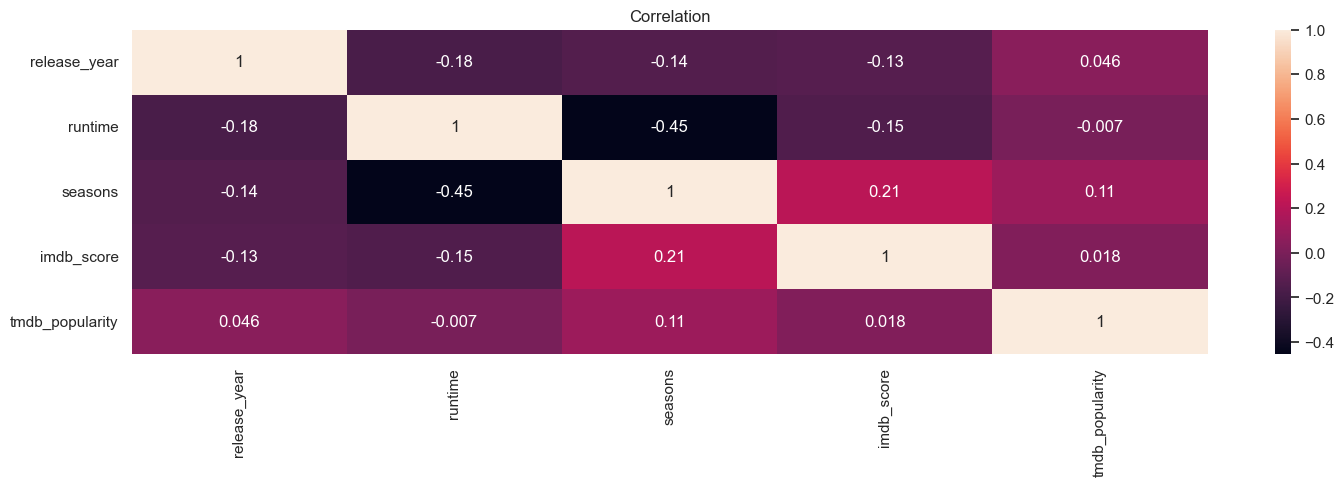

In [27]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.heatmap(df.corr(), annot=True).set_title("Correlation")
plt.xticks(rotation=90)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show(block=True)